# Gerardo de Miguel González

## M1964 Assignment: Building a weather generator

### Python implementation

### Description

Weather generators are computational models which generate (daily) synthetic series of random values simulating the distribution of a particular meteorological variable. Precipitation is the most popular example due to its mixed character: discrete (ocurrence: dry or wet) and continuous (rain amount for wet days). The discrete part is typically characterized by the frequency of wet/dry days (say, e.g. 0.53/0.47 in Santander), whereas the continuous is typically characterized by an exponential distribution defined by a rate parameter.

The main control structures (conditionals and loops) will be used and applied to build a simple weather generator and create artificial precipitation amount series. Some functions which simulate (pseudo)random numbers from different families of distributions (uniform and exponential) will also be used. This is a key task for several computational statistics problems.

### How does a precipitation time series look like?

In order to work with real data, we will use two files with daily information for two weather stations: Santander CMT (RR_STAID003922.txt) and Santander/Parayas (RR_STAID003923.txt). The former is located in the Santander regional center (close to el Faro de Cabo Mayor) and the latter is located in Santander airport. 

#### ::GMG::Task 1

I will open Santander CMT dataset (RR_STAID003922.txt) and see the structure. it has some lines with information (to be skipped) and then a header followed by number in columns (STAID: the code of the station; SOUI: the international code of the station; DATA: the day; RR: precipitation value; Q_RR: a quality control flat, 0: OK; 9: missing data.

::GMG::First 20 line metadata exceprt ...

> EUROPEAN CLIMATE ASSESSMENT & DATASET (ECA&D), file created on: 10-11-2017
>
> THESE DATA CAN BE USED FREELY FOR NON-COMMERCIAL RESEARCH PROVIDED THAT THE FOLLOWING SOURCE IS ACKNOWLEDGED: 
>
> Klein Tank, A.M.G. and Coauthors, 2002. Daily dataset of 20th-century surface
air temperature and precipitation series for the European Climate Assessment.
Int. J. of Climatol., 22, 1441-1453.
>
> Data and metadata available at http://www.ecad.eu
>
> FILE FORMAT (MISSING VALUE CODE = -9999):
>
> 01-06 STAID: Station identifier
> 08-13 SOUID: Source identifier
> 15-22 DATE : Date YYYYMMDD
> 24-28 RR   : Precipitation amount in 0.1 mm
> 30-34 Q_RR : quality code for RR (0='valid'; 1='suspect'; 9='missing')
>
> This is the blended series of station SANTANDER CMT, SPAIN (STAID: 3922)
>
> Blended and updated with sources:19972 19981 908023 
>
> See files sources.txt and stations.txt for more info.

## ::GMG::Task 2

I will load the Santander CMT dataset and plot the year 2016 of precipitation data (RR column). As the precipitation data is in 0.1 mm units so the actual mm (l/m²) is the data value divided by 10. I will also check that the dataset has no suspect or missing values.

In [1]:
import pandas as pd
import numpy as np

#::GMG::Loading data for Santander CMT
#       Skip first 20 line dataset description and include header with column names:
#
#       01-06 STAID: Station identifier
#       08-13 SOUID: Source identifier
#       15-22 DATE : Date YYYYMMDD
#       24-28 RR   : Precipitation amount in 0.1 mm
#       30-34 Q_RR : quality code for RR (0='valid'; 1='suspect'; 9='missing')
#
#       FILE FORMAT (MISSING VALUE CODE = -9999)
#
#::GMG::Pandas read_csv
#       https://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_csv.html
#
#       Skip 20 first rows ...
#       https://stackoverflow.com/questions/20637439/skip-rows-during-csv-import-pandas#
#       https://stackoverflow.com/questions/27325652/python-pandas-read-csv-skip-rows-but-keep-header/27325729#
#
precip_s = pd.read_csv('RR_STAID003922.txt',skiprows=range(0, 20))

In [2]:
#::GMG::Print the basics of tha dataset
#       see: https://www.shanelynn.ie/using-pandas-dataframe-creating-editing-viewing-data-in-python/
#            https://www.quora.com/How-do-I-get-the-number-of-columns-in-a-pandas-dataframe
#  
print(type(precip_s))
print ('Dataset has {0[0]} rows x {0[1]} columns.'.format(precip_s.shape))
print('::GMG::Messy columns here (i.e. leading spaces and all): \n',precip_s.columns)
#::GMG::There are 'messy' column names with spaces ... bound to trouble here!
#  see:
#    https://medium.com/@chaimgluck1/working-with-pandas-fixing-messy-column-names-42a54a6659cd
#    https://stackoverflow.com/questions/21606987/how-can-i-strip-the-whitespace-from-pandas-dataframe-headers   
#
precip_s.columns = precip_s.columns.str.strip()
print('Now they are proper colmuns: \n',precip_s.columns)

<class 'pandas.core.frame.DataFrame'>
Dataset has 34273 rows x 5 columns.
::GMG::Messy columns here (i.e. leading spaces and all): 
 Index(['STAID', ' SOUID', '    DATE', '   RR', ' Q_RR'], dtype='object')
Now they are proper colmuns: 
 Index(['STAID', 'SOUID', 'DATE', 'RR', 'Q_RR'], dtype='object')


In [3]:
print('Counting data per column: \n', precip_s.count())
print('Column (numpy) data types: \n', precip_s.dtypes)
print('Some statistics on RR series (mm ~ l/m²):')
print((precip_s['RR']/10).describe())

Counting data per column: 
 STAID    34273
SOUID    34273
DATE     34273
RR       34273
Q_RR     34273
dtype: int64
Column (numpy) data types: 
 STAID    int64
SOUID    int64
DATE     int64
RR       int64
Q_RR     int64
dtype: object
Some statistics on RR series (mm ~ l/m²):
count    34273.000000
mean         3.182873
std          7.264932
min          0.000000
25%          0.000000
50%          0.000000
75%          3.000000
max        126.200000
Name: RR, dtype: float64


In [4]:
print("First rows ...")
precip_s.head(20)

First rows ...


,STAID,SOUID,DATE,RR,Q_RR
0,3922,19972,19240101,1,0
1,3922,19972,19240102,25,0
2,3922,19972,19240103,7,0
3,3922,19972,19240104,96,0
4,3922,19972,19240105,0,0
5,3922,19972,19240106,0,0
6,3922,19972,19240107,4,0
7,3922,19972,19240108,15,0
8,3922,19972,19240109,65,0
9,3922,19972,19240110,13,0


In [5]:
print("... last rows.")
precip_s.tail(20)

... last rows.


,STAID,SOUID,DATE,RR,Q_RR
34253,3922,19981,20171012,0,0
34254,3922,19981,20171013,0,0
34255,3922,19981,20171014,0,0
34256,3922,19981,20171015,0,0
34257,3922,19981,20171016,0,0
34258,3922,19981,20171017,0,0
34259,3922,19981,20171018,40,0
34260,3922,19981,20171019,36,0
34261,3922,19981,20171020,8,0
34262,3922,19981,20171021,6,0


In [6]:
#::GMG::Ploting data for Santander CMT
#       See: http://pandas.pydata.org/pandas-docs/version/0.13/visualization.html
#
import matplotlib.pyplot as plt

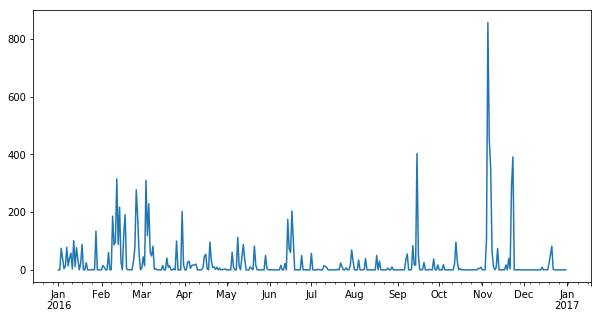

In [7]:
#::GMG::I put RR as a pandas Series indexed by DATE YYYYMMDD as date_range()
#
#       See:
#       https://pandas.pydata.org/pandas-docs/stable/indexing.html
#       http://pandas.pydata.org/pandas-docs/stable/generated/pandas.date_range.html
#       https://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.reindex.html
# 
start = precip_s['DATE'] >= 20160101 
end = precip_s['DATE'] <= 20161231
cond = start & end
#display(type(precip_s[cond][['DATE','RR']]), type(precip_s[cond]['RR']))
dates = pd.date_range(start='20160101', end='20161231')
serie_s = list(precip_s[cond]['RR'])
#display(type(serie_s), type(dates))
ts = pd.Series(serie_s,index=dates)
#::GMG::Large enough plot 10 x 5 inches
# See:
# https://stackoverflow.com/questions/36367986/how-to-make-inline-plots-in-jupyter-notebook-larger
plt.rcParams['figure.figsize'] = [10, 5]
ts.plot()

#### ::GMG::Task 3

I will load the dataset for Parayas and plot the year 2016. The time span of this series is not the same than in the first one. It starts in september 1953 and then spans until 2017. In addition, this series also contains missing data characterized by the RR column number -9999 and Q_RR column value of 9. Then again, the units of the data is "10 * mm". I have to divide by 10 in order to get "mm" (liters per square meter).

::GMG::Here it is the 20 line metada section within the TXT file

> EUROPEAN CLIMATE ASSESSMENT & DATASET (ECA&D), file created on: 10-11-2017
>
> THESE DATA CAN BE USED FREELY FOR NON-COMMERCIAL RESEARCH PROVIDED THAT THE FOLLOWING SOURCE IS ACKNOWLEDGED: 
>
> Klein Tank, A.M.G. and Coauthors, 2002. Daily dataset of 20th-century surface air temperature and precipitation series for the European Climate Assessment.
>
> Int. J. of Climatol., 22, 1441-1453.
>
> Data and metadata available at http://www.ecad.eu
>
> FILE FORMAT (MISSING VALUE CODE = -9999):
>
> 01-06 STAID: Station identifier
> 08-13 SOUID: Source identifier
> 15-22 DATE : Date YYYYMMDD
> 24-28 RR   : Precipitation amount in 0.1 mm
> 30-34 Q_RR : quality code for RR (0='valid'; 1='suspect'; 9='missing')
>
> This is the blended series of station SANTANDER/PARAYAS, SPAIN (STAID: 3923)
>
> Blended and updated with sources:19990 
>
> See files sources.txt and stations.txt for more info.

Same structure of columns. Let's get this task done.

In [9]:
precip_p = pd.read_csv('RR_STAID003923.txt',skiprows=range(0, 20))
print(type(precip_p))
print ('Dataset has {0[0]} rows x {0[1]} columns.'.format(precip_p.shape))
precip_p.columns = precip_p.columns.str.strip()
print('::GMG::Dataset columns here: \n',precip_p.columns)
print('Counting data per column: \n', precip_p.count())
print('Column (numpy) data types: \n', precip_p.dtypes)
print('Some statistics on RR series (mm ~ l/m²):')
print((precip_p['RR']/10).describe())

<class 'pandas.core.frame.DataFrame'>
Dataset has 23437 rows x 5 columns.
::GMG::Dataset columns here: 
 Index(['STAID', 'SOUID', 'DATE', 'RR', 'Q_RR'], dtype='object')
Counting data per column: 
 STAID    23437
SOUID    23437
DATE     23437
RR       23437
Q_RR     23437
dtype: int64
Column (numpy) data types: 
 STAID    int64
SOUID    int64
DATE     int64
RR       int64
Q_RR     int64
dtype: object
Some statistics on RR series (mm ~ l/m²):
count    23437.000000
mean       -32.227158
std        185.811623
min       -999.900000
25%          0.000000
50%          0.000000
75%          2.700000
max        134.400000
Name: RR, dtype: float64


In [10]:
print("First rows ...")
precip_p.head(20)

First rows ...


,STAID,SOUID,DATE,RR,Q_RR
0,3923,19990,19530901,-9999,9
1,3923,19990,19530902,-9999,9
2,3923,19990,19530903,-9999,9
3,3923,19990,19530904,-9999,9
4,3923,19990,19530905,-9999,9
5,3923,19990,19530906,-9999,9
6,3923,19990,19530907,-9999,9
7,3923,19990,19530908,-9999,9
8,3923,19990,19530909,-9999,9
9,3923,19990,19530910,-9999,9


In [11]:
print("... last rows.")
precip_p.tail(20)

... last rows.


,STAID,SOUID,DATE,RR,Q_RR
23417,3923,19990,20171012,0,0
23418,3923,19990,20171013,0,0
23419,3923,19990,20171014,0,0
23420,3923,19990,20171015,0,0
23421,3923,19990,20171016,0,0
23422,3923,19990,20171017,0,0
23423,3923,19990,20171018,53,0
23424,3923,19990,20171019,0,0
23425,3923,19990,20171020,15,0
23426,3923,19990,20171021,0,0


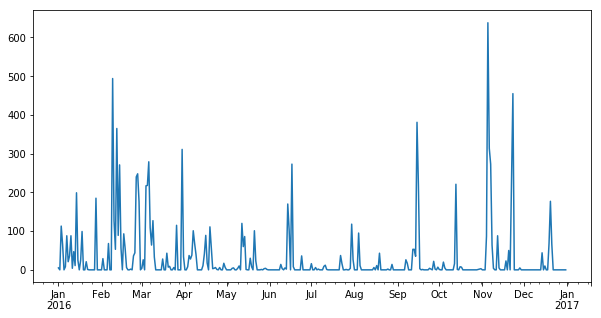

In [13]:
start = precip_p['DATE'] >= 20160101 
end = precip_p['DATE'] <= 20161231
cond = start & end
dates = pd.date_range(start='20160101', end='20161231')
serie_p = list(precip_p[cond]['RR'])
ts = pd.Series(serie_p,index=dates)
#::GMG::Large enough plot 10 x 5 inches
# See:
# https://stackoverflow.com/questions/36367986/how-to-make-inline-plots-in-jupyter-notebook-larger
plt.rcParams['figure.figsize'] = [10, 5]
ts.plot()